In [1]:
#Importing
import pandas as pd
import numpy as np
import os
import math
from scipy import ndimage
import matplotlib.pyplot as plt
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import read_lightcurve_dat

In [2]:
def absolutemag_wextinct(mag,dist,dust):
    '''
    '''
    M = mag + 5 - (5*math.log10(dist)) - dust

    return M

In [3]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [4]:
#This is to read my csv files
Gaia0 = pd.read_csv('Research/Bailer_Jones_Gaia0.csv')
Gaia1 = pd.read_csv('Research/Bailer_Jones_Gaia1.csv')

#Extinciton files
Ext13_13_5 = pd.read_csv('Research/Paper_Writing_Stuff/index_13_13.5_subset.csv')
Ext13_5_14 = pd.read_csv('Research/Paper_Writing_Stuff/index_13.5_14_subset.csv')

# Dipper Stuff
Dipper = pd.read_csv('Research/Bailer_Jones_Dippers.csv')

/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_45688/3287701598.py:2: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia0 = pd.read_csv('Research/Bailer_Jones_Gaia0.csv')
/var/folders/tg/9q1zz56d7qs4655vs65rm14m0000gn/T/ipykernel_45688/3287701598.py:3: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Gaia1 = pd.read_csv('Research/Bailer_Jones_Gaia1.csv')


In [5]:
#Removing bad (negative) parallaxes
good_plx0 = Gaia0.loc[Gaia0['plx'] > 0].reset_index(drop=True)

good_plx1 = Gaia1.loc[Gaia1['plx'] > 0].reset_index(drop=True)

In [6]:
#Finding the corresponding Extinction
Ext13ID0 = good_plx0['asas_sn_id']
Ext13_0 = pd.DataFrame()
for i in Ext13ID0:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_0 = pd.concat([Ext13_0,row]).reset_index(drop=True)

Ext14ID0 = good_plx0['asas_sn_id']
Ext14_0 = pd.DataFrame()
for i in Ext14ID0:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_0 = pd.concat([Ext14_0,row]).reset_index(drop=True)

Ext0 = pd.concat([Ext13_0,Ext14_0])


Ext13ID1 = good_plx1['asas_sn_id']
Ext13_1 = pd.DataFrame()
for i in Ext13ID1:
    row = Ext13_13_5.loc[Ext13_13_5['asas_sn_id'] == i].reset_index(drop=True)
    Ext13_1 = pd.concat([Ext13_1,row]).reset_index(drop=True)

Ext14ID1 = good_plx1['asas_sn_id']
Ext14_1 = pd.DataFrame()
for i in Ext14ID1:
    row = Ext13_5_14.loc[Ext13_5_14['asas_sn_id'] == i].reset_index(drop=True)
    Ext14_1 = pd.concat([Ext14_1,row]).reset_index(drop=True)

Ext1 = pd.concat([Ext13_1,Ext14_1])

In [7]:
#Add the extinction to dataframes
AID130 = Ext0['asas_sn_id']
gp0 = good_plx0['asas_sn_id']
df0 = pd.DataFrame()
for i in AID130:
    row = good_plx0.loc[good_plx0['asas_sn_id'] == i].reset_index(drop=True)
    df0 = pd.concat([df0,row]).reset_index(drop=True)
df0E = df0.merge(Ext0[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')


AID131 = Ext1['asas_sn_id']
gp1 = good_plx1['asas_sn_id']
df1 = pd.DataFrame()
for i in AID131:
    row = good_plx1.loc[good_plx1['asas_sn_id'] == i].reset_index(drop=True)
    df1 = pd.concat([df1,row]).reset_index(drop=True)
df1E = df1.merge(Ext1[['mwdust_av','mwdust_ag','mwdust_abp','mwdust_arp','asas_sn_id']], on='asas_sn_id',how='left')

In [8]:
print(list(df0E.columns))

print(len(df0E))

print(len(df0E.rpgeo.dropna()))

['col1', 'asas_sn_id', 'ra_deg', 'dec_deg', 'refcat_id', 'gaia_id', 'hip_id', 'tyc_id', 'tmass_id', 'sdss_id', 'allwise_id', 'tic_id', 'plx', 'plx_d', 'pm_ra', 'pm_ra_d', 'pm_dec', 'pm_dec_d', 'gaia_mag', 'gaia_mag_d', 'gaia_b_mag', 'gaia_b_mag_d', 'gaia_r_mag', 'gaia_r_mag_d', 'gaia_eff_temp', 'gaia_g_extinc', 'gaia_var', 'sfd_g_extinc', 'rp_00_1', 'rp_01', 'rp_10', 'pstarrs_g_mag', 'pstarrs_g_mag_d', 'pstarrs_g_mag_chi', 'pstarrs_g_mag_contrib', 'pstarrs_r_mag', 'pstarrs_r_mag_d', 'pstarrs_r_mag_chi', 'pstarrs_r_mag_contrib', 'pstarrs_i_mag', 'pstarrs_i_mag_d', 'pstarrs_i_mag_chi', 'pstarrs_i_mag_contrib', 'pstarrs_z_mag', 'pstarrs_z_mag_d', 'pstarrs_z_mag_chi', 'pstarrs_z_mag_contrib', 'nstat', 'DR3Name', 'RAdeg', 'DEdeg', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'SolID', 'Source', 'RandomI', 'e_RAdeg', 'e_DEdeg', 'Plx_x', 'e_Plx', 'RPlx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'P

In [9]:
dist0 = df0E.rpgeo

dist1 = df1E.rpgeo

In [10]:
mag0 = df0E['Gmag']
Mag0 = [absolutemag_wextinct(mag0[i],dist0[i],df0E.mwdust_ag[i]) for i in range(len(mag0))]

mag1 = df1E['Gmag']
Mag1 = [absolutemag_wextinct(mag1[i],dist1[i],df1E.mwdust_ag[i]) for i in range(len(mag1))]

In [11]:
bp0 = df0E['BPmag']
rp0 = df0E['RPmag']
BP0 = [absolutemag_wextinct(bp0[i],dist0[i],df0E.mwdust_abp[i]) for i in range(len(mag0))]
RP0 = [absolutemag_wextinct(rp0[i],dist0[i],df0E.mwdust_arp[i]) for i in range(len(mag0))]
bprp0 = [x - y for x, y in zip(BP0,RP0)]

bp1 = df1E['BPmag']
rp1 = df1E['RPmag']
BP1 = [absolutemag_wextinct(bp1[i],dist1[i],df1E.mwdust_abp[i]) for i in range(len(mag1))]
RP1 = [absolutemag_wextinct(rp1[i],dist1[i],df1E.mwdust_arp[i]) for i in range(len(mag1))]
bprp1 = [x - y for x, y in zip(BP1,RP1)]

In [12]:
New_Mag = []
New_Color = []

Known_Mag = []
Known_Color = []

Known_SDE_Mag = []
Known_SDE_Color = []

Known_MDE_Mag = []
Known_MDE_Color = []

Known_Dipper_Mag = []
Known_Dipper_Color = []

New_SDE_Mag = []
New_SDE_Color = []

New_MDE_Mag = []
New_MDE_Color = []

New_Dipper_Mag = []
New_Dipper_Color = []

In [13]:
J0607v, J0607g = read_lightcurve_dat(377958261591, 'Research/Updated_LC_data/')
J0607g['Mag'].astype(float)
J0607g['JD'].astype(float)
J0607df = Dipper.loc[Dipper['asassn-id'] == 377958261591].reset_index(drop=True)

mag_G_J0607 = float(J0607df.G_Mag[0])
dist_J0607 = float(J0607df.rpgeo[0])
dust_g_J0607 = float(J0607df.mwdust_ag[0])

Mag_J0607 = absolutemag_wextinct(mag_G_J0607, dist_J0607, dust_g_J0607)
New_Mag.append(Mag_J0607)

mag_bp_J0607 = float(J0607df.BP_Mag[0])
dust_bp_J0607 = float(J0607df.mwdust_abp[0])

bp_J0607 = absolutemag_wextinct(mag_bp_J0607, dist_J0607, dust_bp_J0607)

mag_rp_J0607 = float(J0607df.RP_Mag[0])
dust_rp_J0607 = float(J0607df.mwdust_arp[0])

rp_J0607 = absolutemag_wextinct(mag_rp_J0607, dist_J0607, dust_rp_J0607)

bprp_J0607 = bp_J0607-rp_J0607
New_Color.append(bprp_J0607)

New_SDE_Mag.append(Mag_J0607)
New_SDE_Color.append(bprp_J0607)

print('G Mag:', mag_G_J0607)
print('G Dust:', dust_g_J0607)
print('Distance:', dist_J0607, '+', (float(J0607df.B_rpgeo_xa[0])-dist_J0607), '-', -(float(J0607df.b_rpgeo_x[0])-dist_J0607))
print('Absolute Mag:', Mag_J0607)
print('Color:', bprp_J0607)

G Mag: 12.541338
G Dust: 0.9734050346
Distance: 1904.7644 + 65.91309000000001 - 52.02746000000002
Absolute Mag: 0.1687266378027903
Color: 1.1729356640999975


In [14]:
J0727v, J0727g = read_lightcurve_dat(438086977939, 'Research/Updated_LC_data/')
J0727g['Mag'].astype(float)
J0727g['JD'].astype(float)
J0727df = Dipper.loc[Dipper['asassn-id'] == 438086977939].reset_index(drop=True)

mag_G_J0727 = float(J0727df.G_Mag[0])
dist_J0727 = float(J0727df.rpgeo[0])
dust_g_J0727 = float(J0727df.mwdust_ag[0])

Mag_J0727 = absolutemag_wextinct(mag_G_J0727, dist_J0727, dust_g_J0727)
New_Mag.append(Mag_J0727)

mag_bp_J0727 = float(J0727df.BP_Mag[0])
dust_bp_J0727 = float(J0727df.mwdust_abp[0])

bp_J0727 = absolutemag_wextinct(mag_bp_J0727, dist_J0727, dust_bp_J0727)

mag_rp_J0727 = float(J0727df.RP_Mag[0])
dust_rp_J0727 = float(J0727df.mwdust_arp[0])

rp_J0727 = absolutemag_wextinct(mag_rp_J0727, dist_J0727, dust_rp_J0727)

bprp_J0727 = bp_J0727-rp_J0727
New_Color.append(bprp_J0727)

New_SDE_Mag.append(Mag_J0727)
New_SDE_Color.append(bprp_J0727)

print('G Mag:', mag_G_J0727)
print('G Dust:', dust_g_J0727)
print('Distance:', dist_J0727, '+', (float(J0727df.B_rpgeo_xa[0])-dist_J0727), '-', -(float(J0727df.b_rpgeo_x[0])-dist_J0727))
print('Absolute Mag:', Mag_J0727)
print('Color:', bprp_J0727)

G Mag: 12.127011
G Dust: 1.38848963
Distance: 5192.65137 + 398.09033 - 331.5151399999995
Absolute Mag: -2.838424457140684
Color: 1.5208317110000005


In [15]:
J0716v, J0716g = read_lightcurve_dat(360777377116, 'Research/Updated_LC_data/')
J0716g = J0716g.loc[J0716g['Mag'] < 13.75].reset_index(drop=True)
J0716g['Mag'].astype(float)
J0716g['JD'].astype(float)
J0716df = Dipper.loc[Dipper['asassn-id'] == 360777377116].reset_index(drop=True)

mag_G_J0716 = float(J0716df.G_Mag[0])
dist_J0716 = float(J0716df.rpgeo[0])
dust_g_J0716 = float(J0716df.mwdust_ag[0])

Mag_J0716 = absolutemag_wextinct(mag_G_J0716, dist_J0716, dust_g_J0716)
New_Mag.append(Mag_J0716)

mag_bp_J0716 = float(J0716df.BP_Mag[0])
dust_bp_J0716 = float(J0716df.mwdust_abp[0])

bp_J0716 = absolutemag_wextinct(mag_bp_J0716, dist_J0716, dust_bp_J0716)

mag_rp_J0716 = float(J0716df.RP_Mag[0])
dust_rp_J0716 = float(J0716df.mwdust_arp[0])

rp_J0716 = absolutemag_wextinct(mag_rp_J0716, dist_J0716, dust_rp_J0716)

bprp_J0716 = bp_J0716-rp_J0716
New_Color.append(bprp_J0716)

New_SDE_Mag.append(Mag_J0716)
New_SDE_Color.append(bprp_J0716)

print('G Mag:', mag_G_J0716)
print('G Dust:', dust_g_J0716)
print('Distance:', dist_J0716, '+', (float(J0716df.B_rpgeo_xa[0])-dist_J0716), '-', -(float(J0716df.b_rpgeo_x[0])-dist_J0716))
print('Absolute Mag:', Mag_J0716)
print('Color:', bprp_J0716)

G Mag: 12.619262
G Dust: 0.7617952472
Distance: 8202.12109 + 1483.9248099999986 - 1391.4492100000007
Absolute Mag: -2.7121641301935053
Color: 0.6663412570999987


In [16]:
J0954v, J0954g = read_lightcurve_dat(635655234580, 'Research/Updated_LC_data/')
J0954g['Mag'].astype(float)
J0954g['JD'].astype(float)
J0954df = Dipper.loc[Dipper['asassn-id'] == 635655234580].reset_index(drop=True)

mag_G_J0954 = float(J0954df.G_Mag[0])
dist_J0954 = float(J0954df.rpgeo[0])
dust_g_J0954 = float(J0954df.mwdust_ag[0])

Mag_J0954 = absolutemag_wextinct(mag_G_J0954, dist_J0954, dust_g_J0954)
New_Mag.append(Mag_J0954)

mag_bp_J0954 = float(J0954df.BP_Mag[0])
dust_bp_J0954 = float(J0954df.mwdust_abp[0])

bp_J0954 = absolutemag_wextinct(mag_bp_J0954, dist_J0954, dust_bp_J0954)

mag_rp_J0954 = float(J0954df.RP_Mag[0])
dust_rp_J0954 = float(J0954df.mwdust_arp[0])

rp_J0954 = absolutemag_wextinct(mag_rp_J0954, dist_J0954, dust_rp_J0954)

bprp_J0954 = bp_J0954-rp_J0954
New_Color.append(bprp_J0954)

New_SDE_Mag.append(Mag_J0954)
New_SDE_Color.append(bprp_J0954)

print('G Mag:', mag_G_J0954)
print('G Dust:', dust_g_J0954)
print('Distance:', dist_J0954, '+', (float(J0954df.B_rpgeo_xa[0])-dist_J0954), '-', -(float(J0954df.b_rpgeo_x[0])-dist_J0954))
print('Absolute Mag:', Mag_J0954)
print('Color:', bprp_J0954)

G Mag: 12.872697
G Dust: 0.8803688655
Distance: 1711.01526 + 42.816280000000006 - 37.90221999999994
Absolute Mag: 0.826058720037515
Color: 0.28419920479999927


In [17]:
J1644v, J1644g = read_lightcurve_dat(412317159120, 'Research/Updated_LC_data/')
J1644g['Mag'].astype(float)
J1644g['JD'].astype(float)
J1644df = Dipper.loc[Dipper['asassn-id'] == 412317159120].reset_index(drop=True)

mag_G_J1644 = float(J1644df.G_Mag[0])
dist_J1644 = float(J1644df.rpgeo[0])
dust_g_J1644 = float(J1644df.mwdust_ag[0])

Mag_J1644 = absolutemag_wextinct(mag_G_J1644, dist_J1644, dust_g_J1644)
New_Mag.append(Mag_J1644)

mag_bp_J1644 = float(J1644df.BP_Mag[0])
dust_bp_J1644 = float(J1644df.mwdust_abp[0])

bp_J1644 = absolutemag_wextinct(mag_bp_J1644, dist_J1644, dust_bp_J1644)

mag_rp_J1644 = float(J1644df.RP_Mag[0])
dust_rp_J1644 = float(J1644df.mwdust_arp[0])

rp_J1644 = absolutemag_wextinct(mag_rp_J1644, dist_J1644, dust_rp_J1644)

bprp_J1644 = bp_J1644-rp_J1644
New_Color.append(bprp_J1644)

New_SDE_Mag.append(Mag_J1644)
New_SDE_Color.append(bprp_J1644)

print('G Mag:', mag_G_J1644)
print('G Dust:', dust_g_J1644)
print('Distance:', dist_J1644, '+', (float(J1644df.B_rpgeo_xa[0])-dist_J1644), '-', -(float(J1644df.b_rpgeo_x[0])-dist_J1644))
print('Absolute Mag:', Mag_J1644)
print('Color:', bprp_J1644)

G Mag: 12.637036
G Dust: 1.26695427
Distance: 1771.52771 + 50.96154999999999 - 62.806150000000116
Absolute Mag: 0.12834198050676382
Color: 1.249701079300003


In [18]:
J1817v, J1817g = read_lightcurve_dat(317827964025, 'Research/Updated_LC_data/')
J1817g['Mag'].astype(float)
J1817g['JD'].astype(float)
J1817df = Dipper.loc[Dipper['asassn-id'] == 317827964025].reset_index(drop=True)

mag_G_J1817 = float(J1817df.G_Mag[0])
dist_J1817 = float(J1817df.rpgeo[0])
dust_g_J1817 = float(J1817df.mwdust_ag[0])

Mag_J1817 = absolutemag_wextinct(mag_G_J1817, dist_J1817, dust_g_J1817)
New_Mag.append(Mag_J1817)

mag_bp_J1817 = float(J1817df.BP_Mag[0])
dust_bp_J1817 = float(J1817df.mwdust_abp[0])

bp_J1817 = absolutemag_wextinct(mag_bp_J1817, dist_J1817, dust_bp_J1817)

mag_rp_J1817 = float(J1817df.RP_Mag[0])
dust_rp_J1817 = float(J1817df.mwdust_arp[0])

rp_J1817 = absolutemag_wextinct(mag_rp_J1817, dist_J1817, dust_rp_J1817)

bprp_J1817 = bp_J1817-rp_J1817
New_Color.append(bprp_J1817)

New_SDE_Mag.append(Mag_J1817)
New_SDE_Color.append(bprp_J1817)

print('G Mag:', mag_G_J1817)
print('G Dust:', dust_g_J1817)
print('Distance:', dist_J1817)
print('Distance:', dist_J1817, '+', (float(J1817df.B_rpgeo_xa[0])-dist_J1817), '-', -(float(J1817df.b_rpgeo_x[0])-dist_J1817))
print('Absolute Mag:', Mag_J1817)
print('Color:', bprp_J1817)

G Mag: 10.878822
G Dust: 1.221519135
Distance: 1941.526
Distance: 1941.526 + 123.47376000000008 - 84.90868999999998
Absolute Mag: -1.7834131889388505
Color: 2.2682059825999987


In [19]:
J1831v, J1831g = read_lightcurve_dat(438086901547, 'Research/Updated_LC_data/')
J1831g = J1831g.loc[J1831g['Mag'] < 14.5].reset_index(drop=True)
J1831g['Mag'].astype(float)
J1831g['JD'].astype(float)
J1831df = Dipper.loc[Dipper['asassn-id'] == 438086901547].reset_index(drop=True)

mag_G_J1831 = float(J1831df.G_Mag[0])
dist_J1831 = float(J1831df.rpgeo[0])
dust_g_J1831 = float(J1831df.mwdust_ag[0])

Mag_J1831 = absolutemag_wextinct(mag_G_J1831, dist_J1831, dust_g_J1831)
New_Mag.append(Mag_J1831)

mag_bp_J1831 = float(J1831df.BP_Mag[0])
dust_bp_J1831 = float(J1831df.mwdust_abp[0])

bp_J1831 = absolutemag_wextinct(mag_bp_J1831, dist_J1831, dust_bp_J1831)

mag_rp_J1831 = float(J1831df.RP_Mag[0])
dust_rp_J1831 = float(J1831df.mwdust_arp[0])

rp_J1831 = absolutemag_wextinct(mag_rp_J1831, dist_J1831, dust_rp_J1831)

bprp_J1831 = bp_J1831-rp_J1831
New_Color.append(bprp_J1831)

New_SDE_Mag.append(Mag_J1831)
New_SDE_Color.append(bprp_J1831)

print('G Mag:', mag_G_J1831)
print('G Dust:', dust_g_J1831)
print('Distance:', dist_J1831, '+', (float(J1831df.B_rpgeo_xa[0])-dist_J1831), '-', -(float(J1831df.b_rpgeo_x[0])-dist_J1831))
print('Absolute Mag:', Mag_J1831)
print('Color:', bprp_J1831)

G Mag: 12.520057
G Dust: 0.362057681
Distance: 6261.66992 + 565.3593799999999 - 619.4819299999999
Absolute Mag: -1.8254515326161749
Color: 1.766474847500003


In [20]:
J1919v, J1919g = read_lightcurve_dat(515396514761, 'Research/Updated_LC_data/')
J1919g['Mag'].astype(float)
J1919g['JD'].astype(float)
J1919df = Dipper.loc[Dipper['asassn-id'] == 515396514761].reset_index(drop=True)

mag_G_J1919 = float(J1919df.G_Mag[0])
dist_J1919 = float(J1919df.rpgeo[0])
dust_g_J1919 = float(J1919df.mwdust_ag[0])

Mag_J1919 = absolutemag_wextinct(mag_G_J1919, dist_J1919, dust_g_J1919)
New_Mag.append(Mag_J1919)

mag_bp_J1919 = float(J1919df.BP_Mag[0])
dust_bp_J1919 = float(J1919df.mwdust_abp[0])

bp_J1919 = absolutemag_wextinct(mag_bp_J1919, dist_J1919, dust_bp_J1919)

mag_rp_J1919 = float(J1919df.RP_Mag[0])
dust_rp_J1919 = float(J1919df.mwdust_arp[0])

rp_J1919 = absolutemag_wextinct(mag_rp_J1919, dist_J1919, dust_rp_J1919)

bprp_J1919 = bp_J1919-rp_J1919
New_Color.append(bprp_J1919)

New_SDE_Mag.append(Mag_J1919)
New_SDE_Color.append(bprp_J1919)

print('G Mag:', mag_G_J1919)
print('G Dust:', dust_g_J1919)
print('Distance:', dist_J1919, '+', (float(J1919df.B_rpgeo_xa[0])-dist_J1919), '-', -(float(J1919df.b_rpgeo_x[0])-dist_J1919))
print('Absolute Mag:', Mag_J1919)
print('Color:', bprp_J1919)

G Mag: 12.335864
G Dust: 0.4443805661
Distance: 2931.26709 + 83.93506000000025 - 110.70116999999982
Absolute Mag: -0.44379352664493377
Color: 1.5124921472000028


In [21]:
J2071v, J2071g = read_lightcurve_dat(463856535113, 'Research/Updated_LC_data/')
J2071g['Mag'].astype(float)
J2071g['JD'].astype(float)
J2071df = Dipper.loc[Dipper['asassn-id'] == 463856535113].reset_index(drop=True)

mag_G_J2071 = float(J2071df.G_Mag[0])
dist_J2071 = float(J2071df.rpgeo[0])
dust_g_J2071 = float(J2071df.mwdust_ag[0])

Mag_J2071 = absolutemag_wextinct(mag_G_J2071, dist_J2071, dust_g_J2071)
New_Mag.append(Mag_J2071)

mag_bp_J2071 = float(J2071df.BP_Mag[0])
dust_bp_J2071 = float(J2071df.mwdust_abp[0])

bp_J2071 = absolutemag_wextinct(mag_bp_J2071, dist_J2071, dust_bp_J2071)

mag_rp_J2071 = float(J2071df.RP_Mag[0])
dust_rp_J2071 = float(J2071df.mwdust_arp[0])

rp_J2071 = absolutemag_wextinct(mag_rp_J2071, dist_J2071, dust_rp_J2071)

bprp_J2071 = bp_J2071-rp_J2071
New_Color.append(bprp_J2071)

New_SDE_Mag.append(Mag_J2071)
New_SDE_Color.append(bprp_J2071)

print('G Mag:', mag_G_J2071)
print('G Dust:', dust_g_J2071)
print('Distance:', dist_J2071, '+', (float(J2071df.B_rpgeo_xa[0])-dist_J2071), '-', -(float(J2071df.b_rpgeo_x[0])-dist_J2071))
print('Absolute Mag:', Mag_J2071)
print('Color:', bprp_J2071)

G Mag: 12.983052
G Dust: 0.1123873884
Distance: 1224.20081 + 32.82788000000005 - 30.063360000000102
Absolute Mag: 2.431401299015599
Color: 0.8226591135700045


In [22]:
J2148v, J2148g = read_lightcurve_dat(120259184943, 'Research/Updated_LC_data/')
J2148g['Mag'].astype(float)
J2148g['JD'].astype(float)
J2148df = Dipper.loc[Dipper['asassn-id'] == 120259184943].reset_index(drop=True)

mag_G_J2148 = float(J2148df.G_Mag[0])
dist_J2148 = float(J2148df.rpgeo[0])
dust_g_J2148 = float(J2148df.mwdust_ag[0])

Mag_J2148 = absolutemag_wextinct(mag_G_J2148, dist_J2148, dust_g_J2148)
New_Mag.append(Mag_J2148)

mag_bp_J2148 = float(J2148df.BP_Mag[0])
dust_bp_J2148 = float(J2148df.mwdust_abp[0])

bp_J2148 = absolutemag_wextinct(mag_bp_J2148, dist_J2148, dust_bp_J2148)

mag_rp_J2148 = float(J2148df.RP_Mag[0])
dust_rp_J2148 = float(J2148df.mwdust_arp[0])

rp_J2148 = absolutemag_wextinct(mag_rp_J2148, dist_J2148, dust_rp_J2148)

bprp_J2148 = bp_J2148-rp_J2148
New_Color.append(bprp_J2148)

New_SDE_Mag.append(Mag_J2148)
New_SDE_Color.append(bprp_J2148)

print('G Mag:', mag_G_J2148)
print('G Dust:', dust_g_J2148)
print('Distance:', dist_J2148, '+', (float(J2148df.B_rpgeo_xa[0])-dist_J2148), '-', -(float(J2148df.b_rpgeo_x[0])-dist_J2148))
print('Absolute Mag:', Mag_J2148)
print('Color:', bprp_J2148)

G Mag: 10.594145
G Dust: 1.211569681
Distance: 1528.43469 + 65.41637999999989 - 58.95764000000008
Absolute Mag: -1.5386591112971375
Color: 2.192838998100001


In [23]:
J225623v, J225623g = read_lightcurve_dat(25770019815, 'Research/Updated_LC_data/')
J225623g['Mag'].astype(float)
J225623g['JD'].astype(float)
J225623df = Dipper.loc[Dipper['asassn-id'] == 25770019815].reset_index(drop=True)

mag_G_J225623 = float(J225623df.G_Mag[0])
dist_J225623 = float(J225623df.rpgeo[0])
dust_g_J225623 = float(J225623df.mwdust_ag[0])

Mag_J225623 = absolutemag_wextinct(mag_G_J225623, dist_J225623, dust_g_J225623)
New_Mag.append(Mag_J225623)

mag_bp_J225623 = float(J225623df.BP_Mag[0])
dust_bp_J225623 = float(J225623df.mwdust_abp[0])

bp_J225623 = absolutemag_wextinct(mag_bp_J225623, dist_J225623, dust_bp_J225623)

mag_rp_J225623 = float(J225623df.RP_Mag[0])
dust_rp_J225623 = float(J225623df.mwdust_arp[0])

rp_J225623 = absolutemag_wextinct(mag_rp_J225623, dist_J225623, dust_rp_J225623)

bprp_J225623 = bp_J225623-rp_J225623
New_Color.append(bprp_J225623)

New_SDE_Mag.append(Mag_J225623)
New_SDE_Color.append(bprp_J225623)

print('G Mag:', mag_G_J225623)
print('G Dust:', dust_g_J225623)
print('Distance:', dist_J225623, '+', (float(J225623df.B_rpgeo_xa[0])-dist_J225623), '-', -(float(J225623df.b_rpgeo_x[0])-dist_J225623))
print('Absolute Mag:', Mag_J225623)
print('Color:', bprp_J225623)

G Mag: 12.865724
G Dust: 0.7406342874
Distance: 2249.6311 + 66.64599999999973 - 80.14575000000013
Absolute Mag: 0.36453317619778747
Color: 1.124370906599999


In [24]:
J0063v, J0063g = read_lightcurve_csv(94489418658, 'Research/Updated_LC_data/')
J0063g['Mag'].astype(float)
J0063g['JD'].astype(float)
J0063df = Dipper.loc[Dipper['asassn-id'] == 94489418658].reset_index(drop=True)

mag_G_J0063 = float(J0063df.G_Mag[0])
dist_J0063 = float(J0063df.rpgeo[0])
dust_g_J0063 = float(J0063df.mwdust_ag[0])

Mag_J0063 = absolutemag_wextinct(mag_G_J0063, dist_J0063, dust_g_J0063)
Known_Mag.append(Mag_J0063)

mag_bp_J0063 = float(J0063df.BP_Mag[0])
dust_bp_J0063 = float(J0063df.mwdust_abp[0])

bp_J0063 = absolutemag_wextinct(mag_bp_J0063, dist_J0063, dust_bp_J0063)

mag_rp_J0063 = float(J0063df.RP_Mag[0])
dust_rp_J0063 = float(J0063df.mwdust_arp[0])

rp_J0063 = absolutemag_wextinct(mag_rp_J0063, dist_J0063, dust_rp_J0063)

bprp_J0063 = bp_J0063-rp_J0063
Known_Color.append(bprp_J0063)

New_MDE_Mag.append(Mag_J0063)
New_MDE_Color.append(bprp_J0063)

print('G Mag:', mag_G_J0063)
print('G Dust:', dust_g_J0063)
print('Distance:', dist_J0063, '+', (float(J0063df.B_rpgeo_xa[0])-dist_J0063), '-', -(float(J0063df.b_rpgeo_x[0])-dist_J0063))
print('Absolute Mag:', Mag_J0063)
print('Color:', bprp_J0063)

G Mag: 12.180395
G Dust: 1.133067557
Distance: 2180.86353
Distance: 2180.86353 + 50.77489999999989 - 57.00415000000021
Absolute Mag: -0.6458150068047952
Color: 1.3922177319000006


In [25]:
J1262v, J1262g = read_lightcurve_dat(515397118400, 'Research/Updated_LC_data/')
J1262g['Mag'].astype(float)
J1262g['JD'].astype(float)
J1262df = Dipper.loc[Dipper['asassn-id'] == 515397118400].reset_index(drop=True)

mag_G_J1262 = float(J1262df.G_Mag[0])
dist_J1262 = float(J1262df.rpgeo[0])
dust_g_J1262 = float(J1262df.mwdust_ag[0])

Mag_J1262 = absolutemag_wextinct(mag_G_J1262, dist_J1262, dust_g_J1262)
New_Mag.append(Mag_J1262)

mag_bp_J1262 = float(J1262df.BP_Mag[0])
dust_bp_J1262 = float(J1262df.mwdust_abp[0])

bp_J1262 = absolutemag_wextinct(mag_bp_J1262, dist_J1262, dust_bp_J1262)

mag_rp_J1262 = float(J1262df.RP_Mag[0])
dust_rp_J1262 = float(J1262df.mwdust_arp[0])

rp_J1262 = absolutemag_wextinct(mag_rp_J1262, dist_J1262, dust_rp_J1262)

bprp_J1262 = bp_J1262-rp_J1262
New_Color.append(bprp_J1262)

New_MDE_Mag.append(Mag_J1262)
New_MDE_Color.append(bprp_J1262)

print('G Mag:', mag_G_J1262)
print('G Dust:', dust_g_J1262)
print('Distance:', dist_J1262, '+', (float(J1262df.B_rpgeo_xa[0])-dist_J1262), '-', -(float(J1262df.b_rpgeo_x[0])-dist_J1262))
print('Absolute Mag:', Mag_J1262)
print('Color:', bprp_J1262)

G Mag: 11.913733
G Dust: 3.61031639
Distance: 3866.36938 + 201.84619999999995 - 245.50732000000016
Absolute Mag: -4.633100103584889
Color: 0.39696226600000095


In [26]:
J1657v, J1657g = read_lightcurve_dat(661425129485, 'Research/Updated_LC_data/')
J1657g['Mag'].astype(float)
J1657g['JD'].astype(float)
J1657df = Dipper.loc[Dipper['asassn-id'] == 661425129485].reset_index(drop=True)

mag_G_J1657 = float(J1657df.G_Mag[0])
dist_J1657 = float(J1657df.rpgeo[0])
dust_g_J1657 = float(J1657df.mwdust_ag[0])

Mag_J1657 = absolutemag_wextinct(mag_G_J1657, dist_J1657, dust_g_J1657)
New_Mag.append(Mag_J1657)

mag_bp_J1657 = float(J1657df.BP_Mag[0])
dust_bp_J1657 = float(J1657df.mwdust_abp[0])

bp_J1657 = absolutemag_wextinct(mag_bp_J1657, dist_J1657, dust_bp_J1657)

mag_rp_J1657 = float(J1657df.RP_Mag[0])
dust_rp_J1657 = float(J1657df.mwdust_arp[0])

rp_J1657 = absolutemag_wextinct(mag_rp_J1657, dist_J1657, dust_rp_J1657)

bprp_J1657 = bp_J1657-rp_J1657
New_Color.append(bprp_J1657)

New_MDE_Mag.append(Mag_J1657)
New_MDE_Color.append(bprp_J1657)

print('G Mag:', mag_G_J1657)
print('G Dust:', dust_g_J1657)
print('Distance:', dist_J1657, '+', (float(J1657df.B_rpgeo_xa[0])-dist_J1657), '-', -(float(J1657df.b_rpgeo_x[0])-dist_J1657))
print('Absolute Mag:', Mag_J1657)
print('Color:', bprp_J1657)

G Mag: 12.848984
G Dust: 0.9085307345
Distance: 2557.14893 + 80.05223999999998 - 74.66357999999991
Absolute Mag: -0.09832684626575161
Color: 1.0832629475000015


In [27]:
J1712v, J1712g = read_lightcurve_dat(326417831663, 'Research/Updated_LC_data/')
J1712g['Mag'].astype(float)
J1712g['JD'].astype(float)
J1712df = Dipper.loc[Dipper['asassn-id'] == 326417831663].reset_index(drop=True)

mag_G_J1712 = float(J1712df.G_Mag[0])
dist_J1712 = float(J1712df.rpgeo[0])
dust_g_J1712 = float(J1712df.mwdust_ag[0])

Mag_J1712 = absolutemag_wextinct(mag_G_J1712, dist_J1712, dust_g_J1712)
New_Mag.append(Mag_J1712)

mag_bp_J1712 = float(J1712df.BP_Mag[0])
dust_bp_J1712 = float(J1712df.mwdust_abp[0])

bp_J1712 = absolutemag_wextinct(mag_bp_J1712, dist_J1712, dust_bp_J1712)

mag_rp_J1712 = float(J1712df.RP_Mag[0])
dust_rp_J1712 = float(J1712df.mwdust_arp[0])

rp_J1712 = absolutemag_wextinct(mag_rp_J1712, dist_J1712, dust_rp_J1712)

bprp_J1712 = bp_J1712-rp_J1712
New_Color.append(bprp_J1712)

New_MDE_Mag.append(Mag_J1712)
New_MDE_Color.append(bprp_J1712)

print('G Mag:', mag_G_J1712)
print('G Dust:', dust_g_J1712)
print('Distance:', dist_J1712, '+', (float(J1712df.B_rpgeo_xa[0])-dist_J1712), '-', -(float(J1712df.b_rpgeo_x[0])-dist_J1712))
print('Absolute Mag:', Mag_J1712)
print('Color:', bprp_J1712)

G Mag: 12.845829
G Dust: 1.592092546
Distance: 1386.30322 + 34.96056999999996 - 26.217769999999973
Absolute Mag: 0.5444452940708508
Color: 0.48823429400000085


In [28]:
J0415v, J0415g = read_lightcurve_dat(377957522430, 'Research/Updated_LC_data/')
J0415g['Mag'].astype(float)
J0415g['JD'].astype(float)
J0415df = Dipper.loc[Dipper['asassn-id'] == 377957522430].reset_index(drop=True)

mag_G_J0415 = float(J0415df.G_Mag[0])
dist_J0415 = float(J0415df.rpgeo[0])
dust_g_J0415 = float(J0415df.mwdust_ag[0])

Mag_J0415 = absolutemag_wextinct(mag_G_J0415, dist_J0415, dust_g_J0415)
New_Mag.append(Mag_J0415)

mag_bp_J0415 = float(J0415df.BP_Mag[0])
dust_bp_J0415 = float(J0415df.mwdust_abp[0])

bp_J0415 = absolutemag_wextinct(mag_bp_J0415, dist_J0415, dust_bp_J0415)

mag_rp_J0415 = float(J0415df.RP_Mag[0])
dust_rp_J0415 = float(J0415df.mwdust_arp[0])

rp_J0415 = absolutemag_wextinct(mag_rp_J0415, dist_J0415, dust_rp_J0415)

bprp_J0415 = bp_J0415-rp_J0415
New_Color.append(bprp_J0415)

New_Dipper_Mag.append(Mag_J0415)
New_Dipper_Color.append(bprp_J0415)

print('G Mag:', mag_G_J0415)
print('G Dust:', dust_g_J0415)
print('Distance:', dist_J0415, '+', (float(J0415df.B_rpgeo_xa[0])-dist_J0415), '-', -(float(J0415df.b_rpgeo_x[0])-dist_J0415))
print('Absolute Mag:', Mag_J0415)
print('Color:', bprp_J0415)

G Mag: 12.118922
G Dust: 1.35430269
Distance: 288.167389 + 1.6305849999999964 - 1.5726620000000366
Absolute Mag: 3.466395152431409
Color: 1.169583775000003


In [29]:
J0826v, J0826g = read_lightcurve_dat(601296043597, 'Research/Updated_LC_data/')
J0826g['Mag'].astype(float)
J0826g['JD'].astype(float)
J0826df = Dipper.loc[Dipper['asassn-id'] == 601296043597].reset_index(drop=True)

mag_G_J0826 = float(J0826df.G_Mag[0])
dist_J0826 = float(J0826df.rpgeo[0])
dust_g_J0826 = float(J0826df.mwdust_ag[0])

Mag_J0826 = absolutemag_wextinct(mag_G_J0826, dist_J0826, dust_g_J0826)
New_Mag.append(Mag_J0826)

mag_bp_J0826 = float(J0826df.BP_Mag[0])
dust_bp_J0826 = float(J0826df.mwdust_abp[0])

bp_J0826 = absolutemag_wextinct(mag_bp_J0826, dist_J0826, dust_bp_J0826)

mag_rp_J0826 = float(J0826df.RP_Mag[0])
dust_rp_J0826 = float(J0826df.mwdust_arp[0])

rp_J0826 = absolutemag_wextinct(mag_rp_J0826, dist_J0826, dust_rp_J0826)

bprp_J0826 = bp_J0826-rp_J0826
New_Color.append(bprp_J0826)

New_Dipper_Mag.append(Mag_J0826)
New_Dipper_Color.append(bprp_J0826)

print('G Mag:', mag_G_J0826)
print('G Dust:', dust_g_J0826)
print('Distance:', dist_J0826, '+', (float(J0826df.B_rpgeo_xa[0])-dist_J0826), '-', -(float(J0826df.b_rpgeo_x[0])-dist_J0826))
print('Absolute Mag:', Mag_J0826)
print('Color:', bprp_J0826)

G Mag: 13.164856
G Dust: 0.4465756555
Distance: 4759.85059 + 299.68457000000035 - 328.13184
Absolute Mag: -0.6696862584334171
Color: 0.015771133500000034


In [30]:
J1734v, J1734g = read_lightcurve_dat(223339338105, 'Research/Updated_LC_data/')
J1734g['Mag'].astype(float)
J1734g['JD'].astype(float)
J1734df = Dipper.loc[Dipper['asassn-id'] == 223339338105].reset_index(drop=True)

mag_G_J1734 = float(J1734df.G_Mag[0])
dist_J1734 = float(J1734df.rpgeo[0])
dust_g_J1734 = float(J1734df.mwdust_ag[0])

Mag_J1734 = absolutemag_wextinct(mag_G_J1734, dist_J1734, dust_g_J1734)
New_Mag.append(Mag_J1734)

mag_bp_J1734 = float(J1734df.BP_Mag[0])
dust_bp_J1734 = float(J1734df.mwdust_abp[0])

bp_J1734 = absolutemag_wextinct(mag_bp_J1734, dist_J1734, dust_bp_J1734)

mag_rp_J1734 = float(J1734df.RP_Mag[0])
dust_rp_J1734 = float(J1734df.mwdust_arp[0])

rp_J1734 = absolutemag_wextinct(mag_rp_J1734, dist_J1734, dust_rp_J1734)

bprp_J1734 = bp_J1734-rp_J1734
New_Color.append(bprp_J1734)

New_Dipper_Mag.append(Mag_J1734)
New_Dipper_Color.append(bprp_J1734)

print('G Mag:', mag_G_J1734)
print('G Dust:', dust_g_J1734)
print('Distance:', dist_J1734, '+', (float(J1734df.B_rpgeo_xa[0])-dist_J1734), '-', -(float(J1734df.b_rpgeo_x[0])-dist_J1734))
print('Absolute Mag:', Mag_J1734)
print('Color:', bprp_J1734)

G Mag: 12.827092
G Dust: 0.1904488118
Distance: 1903.55408 + 45.72484999999983 - 41.85706000000005
Absolute Mag: 1.238817090007959
Color: 0.9457450642999976


In [31]:
J2038v, J2038g = read_lightcurve_dat(42950993887, 'Research/Updated_LC_data/')
J2038g['Mag'].astype(float)
J2038g['JD'].astype(float)
J2038df = Dipper.loc[Dipper['asassn-id'] == 42950993887].reset_index(drop=True)

mag_G_J2038 = float(J2038df.G_Mag[0])
dist_J2038 = float(J2038df.rpgeo[0])
dust_g_J2038 = float(J2038df.mwdust_ag[0])

Mag_J2038 = absolutemag_wextinct(mag_G_J2038, dist_J2038, dust_g_J2038)
New_Mag.append(Mag_J2038)

mag_bp_J2038 = float(J2038df.BP_Mag[0])
dust_bp_J2038 = float(J2038df.mwdust_abp[0])

bp_J2038 = absolutemag_wextinct(mag_bp_J2038, dist_J2038, dust_bp_J2038)

mag_rp_J2038 = float(J2038df.RP_Mag[0])
dust_rp_J2038 = float(J2038df.mwdust_arp[0])

rp_J2038 = absolutemag_wextinct(mag_rp_J2038, dist_J2038, dust_rp_J2038)

bprp_J2038 = bp_J2038-rp_J2038
New_Color.append(bprp_J2038)

New_Dipper_Mag.append(Mag_J2038)
New_Dipper_Color.append(bprp_J2038)

print('G Mag:', mag_G_J2038)
print('G Dust:', dust_g_J2038)
print('Distance:', dist_J2038, '+', (float(J2038df.B_rpgeo_xa[0])-dist_J2038), '-', -(float(J2038df.b_rpgeo_x[0])-dist_J2038))
print('Absolute Mag:', Mag_J2038)
print('Color:', bprp_J2038)

G Mag: 12.062143
G Dust: 1.564243213
Distance: 1827.15527 + 52.22889000000009 - 46.059079999999994
Absolute Mag: -0.8109774873623923
Color: 0.8826679540000009


In [32]:
J0720v, J0720g = read_lightcurve_dat(335007754417, 'Research/Updated_LC_data/')
J0720g['Mag'].astype(float)
J0720g['JD'].astype(float)
J0720df = Dipper.loc[Dipper['asassn-id'] == 335007754417].reset_index(drop=True)

mag_G_J0720 = float(J0720df.G_Mag[0])
dist_J0720 = float(J0720df.rpgeo[0])
dust_g_J0720 = float(J0720df.mwdust_ag[0])

Mag_J0720 = absolutemag_wextinct(mag_G_J0720, dist_J0720, dust_g_J0720)
Known_Mag.append(Mag_J0720)

mag_bp_J0720 = float(J0720df.BP_Mag[0])
dust_bp_J0720 = float(J0720df.mwdust_abp[0])

bp_J0720 = absolutemag_wextinct(mag_bp_J0720, dist_J0720, dust_bp_J0720)

mag_rp_J0720 = float(J0720df.RP_Mag[0])
dust_rp_J0720 = float(J0720df.mwdust_arp[0])

rp_J0720 = absolutemag_wextinct(mag_rp_J0720, dist_J0720, dust_rp_J0720)

bprp_J0720 = bp_J0720-rp_J0720
Known_Color.append(bprp_J0720)

Known_SDE_Mag.append(Mag_J0720)
Known_SDE_Color.append(bprp_J0720)

print('G Mag:', mag_G_J0720)
print('G Dust:', dust_g_J0720)
print('Distance:', dist_J0720, '+', (float(J0720df.B_rpgeo_xa[0])-dist_J0720), '-', -(float(J0720df.b_rpgeo_x[0])-dist_J0720))
print('Absolute Mag:', Mag_J0720)
print('Color:', bprp_J0720)

G Mag: 14.06455
G Dust: 1.248497765
Distance: 3646.17212 + 253.82592999999997 - 284.42407000000003
Absolute Mag: 0.006866405174456025
Color: 0.31592708860000185


In [33]:
J1701v, J1701g = read_lightcurve_dat(231929175915, 'Research/Updated_LC_data/')
J1701g['Mag'].astype(float)
J1701g['JD'].astype(float)
J1701df = Dipper.loc[Dipper['asassn-id'] == 231929175915].reset_index(drop=True)

mag_G_J1701 = float(J1701df.G_Mag[0])
dist_J1701 = float(J1701df.rpgeo[0])
dust_g_J1701 = float(J1701df.mwdust_ag[0])

Mag_J1701 = absolutemag_wextinct(mag_G_J1701, dist_J1701, dust_g_J1701)
Known_Mag.append(Mag_J1701)

mag_bp_J1701 = float(J1701df.BP_Mag[0])
dust_bp_J1701 = float(J1701df.mwdust_abp[0])

bp_J1701 = absolutemag_wextinct(mag_bp_J1701, dist_J1701, dust_bp_J1701)

mag_rp_J1701 = float(J1701df.RP_Mag[0])
dust_rp_J1701 = float(J1701df.mwdust_arp[0])

rp_J1701 = absolutemag_wextinct(mag_rp_J1701, dist_J1701, dust_rp_J1701)

bprp_J1701 = bp_J1701-rp_J1701
Known_Color.append(bprp_J1701)

Known_SDE_Mag.append(Mag_J1701)
Known_SDE_Color.append(bprp_J1701)

print('G Mag:', mag_G_J1701)
print('G Dust:', dust_g_J1701)
print('Distance:', dist_J1701, '+', (float(J1701df.B_rpgeo_xa[0])-dist_J1701), '-', -(float(J1701df.b_rpgeo_x[0])-dist_J1701))
print('Absolute Mag:', Mag_J1701)
print('Color:', bprp_J1701)

G Mag: 13.387364
G Dust: 0.6771513449
Distance: 3361.97339 + 176.0852 - 187.58838000000014
Absolute Mag: 0.07724129670632296
Color: 1.3013818878999963


In [34]:
J225655v, J225655g = read_lightcurve_dat(60130040391, 'Research/Updated_LC_data/')
J225655g = J225655g.loc[J225655g['Mag'] < 13.8].reset_index(drop=True)
J225655g['Mag'].astype(float)
J225655g['JD'].astype(float)
J225655df = Dipper.loc[Dipper['asassn-id'] == 60130040391].reset_index(drop=True)

mag_G_J225655 = float(J225655df.G_Mag[0])
dist_J225655 = float(J225655df.rpgeo[0])
dust_g_J225655 = float(J225655df.mwdust_ag[0])

Mag_J225655 = absolutemag_wextinct(mag_G_J225655, dist_J225655, dust_g_J225655)
Known_Mag.append(Mag_J225655)

mag_bp_J225655 = float(J225655df.BP_Mag[0])
dust_bp_J225655 = float(J225655df.mwdust_abp[0])

bp_J225655 = absolutemag_wextinct(mag_bp_J225655, dist_J225655, dust_bp_J225655)

mag_rp_J225655 = float(J225655df.RP_Mag[0])
dust_rp_J225655 = float(J225655df.mwdust_arp[0])

rp_J225655 = absolutemag_wextinct(mag_rp_J225655, dist_J225655, dust_rp_J225655)

bprp_J225655 = bp_J225655-rp_J225655
Known_Color.append(bprp_J225655)

Known_SDE_Mag.append(Mag_J225655)
Known_SDE_Color.append(bprp_J225655)

print('G Mag:', mag_G_J225655)
print('G Dust:', dust_g_J225655)
print('Distance:', dist_J225655, '+', (float(J225655df.B_rpgeo_xa[0])-dist_J225655), '-', -(float(J225655df.b_rpgeo_x[0])-dist_J225655))
print('Absolute Mag:', Mag_J225655)
print('Color:', bprp_J225655)

G Mag: 12.35959
G Dust: 0.1269658772
Distance: 354.348755 + 1.3652650000000222 - 1.3671569999999633
Absolute Mag: 4.485469566740571
Color: 0.8261420414800034


In [35]:
J0064v, J0064g = read_lightcurve_dat(68720274411, 'Research/Updated_LC_data/')
J0064g['Mag'].astype(float)
J0064g['JD'].astype(float)
J0064df = Dipper.loc[Dipper['asassn-id'] == 68720274411].reset_index(drop=True)

mag_G_J0064 = float(J0064df.G_Mag[0])
dist_J0064 = float(J0064df.rpgeo[0])
dust_g_J0064 = float(J0064df.mwdust_ag[0])

Mag_J0064 = absolutemag_wextinct(mag_G_J0064, dist_J0064, dust_g_J0064)
Known_Mag.append(Mag_J0064)

mag_bp_J0064 = float(J0064df.BP_Mag[0])
dust_bp_J0064 = float(J0064df.mwdust_abp[0])

bp_J0064 = absolutemag_wextinct(mag_bp_J0064, dist_J0064, dust_bp_J0064)

mag_rp_J0064 = float(J0064df.RP_Mag[0])
dust_rp_J0064 = float(J0064df.mwdust_arp[0])

rp_J0064 = absolutemag_wextinct(mag_rp_J0064, dist_J0064, dust_rp_J0064)

bprp_J0064 = bp_J0064-rp_J0064
Known_Color.append(bprp_J0064)

Known_MDE_Mag.append(Mag_J0064)
Known_MDE_Color.append(bprp_J0064)

print('G Mag:', mag_G_J0064)
print('G Dust:', dust_g_J0064)
print('Distance:', dist_J0064, '+', (float(J0064df.B_rpgeo_xa[0])-dist_J0064), '-', -(float(J0064df.b_rpgeo_x[0])-dist_J0064))
print('Absolute Mag:', Mag_J0064)
print('Color:', bprp_J0064)

G Mag: 11.934379
G Dust: 1.650556379
Distance: 2290.08301 + 109.09595000000036 - 97.14867999999979
Absolute Mag: -1.5154335027770773
Color: 1.1979965519999975


In [36]:
J1858v, J1858g = read_lightcurve_csv(644245387906, 'Research/Updated_LC_data/')
J1858g['Mag'] = J1858g['mag'].astype(float)
J1858g['JD'] = J1858g['HJD'].astype(float)
J1858df = Dipper.loc[Dipper['asassn-id'] == 644245387906].reset_index(drop=True)

mag_G_J1858 = float(J1858df.G_Mag[0])
dist_J1858 = float(J1858df.rpgeo[0])
dust_g_J1858 = float(J1858df.mwdust_ag[0])

Mag_J1858 = absolutemag_wextinct(mag_G_J1858, dist_J1858, dust_g_J1858)
Known_Mag.append(Mag_J1858)

mag_bp_J1858 = float(J1858df.BP_Mag[0])
dust_bp_J1858 = float(J1858df.mwdust_abp[0])

bp_J1858 = absolutemag_wextinct(mag_bp_J1858, dist_J1858, dust_bp_J1858)

mag_rp_J1858 = float(J1858df.RP_Mag[0])
dust_rp_J1858 = float(J1858df.mwdust_arp[0])

rp_J1858 = absolutemag_wextinct(mag_rp_J1858, dist_J1858, dust_rp_J1858)

bprp_J1858 = bp_J1858-rp_J1858
Known_Color.append(bprp_J1858)

Known_MDE_Mag.append(Mag_J1858)
Known_MDE_Color.append(bprp_J1858)

print('G Mag:', mag_G_J1858)
print('G Dust:', dust_g_J1858)
print('Distance:', dist_J1858, '+', (float(J1858df.B_rpgeo_xa[0])-dist_J1858), '-', -(float(J1858df.b_rpgeo_x[0])-dist_J1858))
print('Absolute Mag:', Mag_J1858)
print('Color:', bprp_J1858)

G Mag: 10.860641
G Dust: 0.2608851127
Distance: 2655.82129 + 134.82373000000007 - 110.42309999999998
Absolute Mag: -1.5212383528928508
Color: 2.0717843656


In [37]:
J0706v, J0706g = read_lightcurve_csv(266288137752, 'Research/Updated_LC_data/')
J0706g['Mag'] = J0706g['mag'].astype(float)
J0706g['JD'] = J0706g['HJD'].astype(float)
J0706df = Dipper.loc[Dipper['asassn-id'] == 266288137752].reset_index(drop=True)

mag_G_J0706 = float(J0706df.G_Mag[0])
dist_J0706 = float(J0706df.rpgeo[0])
dust_g_J0706 = float(J0706df.mwdust_ag[0])

Mag_J0706 = absolutemag_wextinct(mag_G_J0706, dist_J0706, dust_g_J0706)
Known_Mag.append(Mag_J0706)

mag_bp_J0706 = float(J0706df.BP_Mag[0])
dust_bp_J0706 = float(J0706df.mwdust_abp[0])

bp_J0706 = absolutemag_wextinct(mag_bp_J0706, dist_J0706, dust_bp_J0706)

mag_rp_J0706 = float(J0706df.RP_Mag[0])
dust_rp_J0706 = float(J0706df.mwdust_arp[0])

rp_J0706 = absolutemag_wextinct(mag_rp_J0706, dist_J0706, dust_rp_J0706)

bprp_J0706 = bp_J0706-rp_J0706
Known_Color.append(bprp_J0706)

Known_Dipper_Mag.append(Mag_J0706)
Known_Dipper_Color.append(bprp_J0706)

print('G Mag:', mag_G_J0706)
print('G Dust:', dust_g_J0706)
print('Distance:', dist_J0706, '+', (float(J0706df.B_rpgeo_xa[0])-dist_J0706), '-', -(float(J0706df.b_rpgeo_x[0])-dist_J0706))
print('Absolute Mag:', Mag_J0706)
print('Color:', bprp_J0706)

G Mag: 12.823618
G Dust: 0.1481268606
Distance: 1010.9079 + 14.947450000000003 - 22.62603999999999
Absolute Mag: 2.6519331870819136
Color: 0.5585913797000028


In [38]:
J0838v, J0838g = read_lightcurve_dat(532576686103, 'Research/Updated_LC_data/')
J0838g['Mag'].astype(float)
J0838g['JD'].astype(float)
J0838df = Dipper.loc[Dipper['asassn-id'] == 532576686103].reset_index(drop=True)

mag_G_J0838 = float(J0838df.G_Mag[0])
dist_J0838 = float(J0838df.rpgeo[0])
dust_g_J0838 = float(J0838df.mwdust_ag[0])

Mag_J0838 = absolutemag_wextinct(mag_G_J0838, dist_J0838, dust_g_J0838)
Known_Mag.append(Mag_J0838)

mag_bp_J0838 = float(J0838df.BP_Mag[0])
dust_bp_J0838 = float(J0838df.mwdust_abp[0])

bp_J0838 = absolutemag_wextinct(mag_bp_J0838, dist_J0838, dust_bp_J0838)

mag_rp_J0838 = float(J0838df.RP_Mag[0])
dust_rp_J0838 = float(J0838df.mwdust_arp[0])

rp_J0838 = absolutemag_wextinct(mag_rp_J0838, dist_J0838, dust_rp_J0838)

bprp_J0838 = bp_J0838-rp_J0838
Known_Color.append(bprp_J0838)

Known_Dipper_Mag.append(Mag_J0838)
Known_Dipper_Color.append(bprp_J0838)

print('G Mag:', mag_G_J0838)
print('G Dust:', dust_g_J0838)
print('Distance:', dist_J0838, '+', (float(J0838df.B_rpgeo_xa[0])-dist_J0838), '-', -(float(J0838df.b_rpgeo_x[0])-dist_J0838))
print('Absolute Mag:', Mag_J0838)
print('Color:', bprp_J0838)

G Mag: 13.370842
G Dust: 0.8702529725
Distance: 556.613953 + 2.627563000000009 - 3.1709600000000364
Absolute Mag: 3.7728185831319236
Color: 0.3593493422999998


In [39]:
J0843v, J0843g = read_lightcurve_csv(352187470767, 'Research/Updated_LC_data/')
J0843g = J0843g.loc[J0843g['mag'] < 20].reset_index(drop=True)
J0843g['Mag'] = J0843g['mag'].astype(float)
J0843g['JD'] = J0843g['HJD'].astype(float)
J0843df = Dipper.loc[Dipper['asassn-id'] == 352187470767].reset_index(drop=True)

mag_G_J0843 = float(J0843df.G_Mag[0])
dist_J0843 = float(J0843df.rpgeo[0])
dust_g_J0843 = float(J0843df.mwdust_ag[0])

Mag_J0843 = absolutemag_wextinct(mag_G_J0843, dist_J0843, dust_g_J0843)
Known_Mag.append(Mag_J0843)

mag_bp_J0843 = float(J0843df.BP_Mag[0])
dust_bp_J0843 = float(J0843df.mwdust_abp[0])

bp_J0843 = absolutemag_wextinct(mag_bp_J0843, dist_J0843, dust_bp_J0843)

mag_rp_J0843 = float(J0843df.RP_Mag[0])
dust_rp_J0843 = float(J0843df.mwdust_arp[0])

rp_J0843 = absolutemag_wextinct(mag_rp_J0843, dist_J0843, dust_rp_J0843)

bprp_J0843 = bp_J0843-rp_J0843
Known_Color.append(bprp_J0843)

Known_Dipper_Mag.append(Mag_J0843)
Known_Dipper_Color.append(bprp_J0843)

print('G Mag:', mag_G_J0843)
print('G Dust:', dust_g_J0843)
print('Distance:', dist_J0843, '+', (float(J0843df.B_rpgeo_xa[0])-dist_J0843), '-', -(float(J0843df.b_rpgeo_x[0])-dist_J0843))
print('Absolute Mag:', Mag_J0843)
print('Color:', bprp_J0843)

G Mag: 11.76485
G Dust: 2.299445046
Distance: 1031.28235 + 72.57006999999999 - 67.68927099999996
Absolute Mag: -0.6014829711529681
Color: -0.17659353599999883


In [40]:
J1162v, J1162g = read_lightcurve_dat(609886184506, 'Research/Updated_LC_data/')
J1162g['Mag'].astype(float)
J1162g['JD'].astype(float)
J1162df = Dipper.loc[Dipper['asassn-id'] == 609886184506].reset_index(drop=True)

mag_G_J1162 = float(J1162df.G_Mag[0])
dist_J1162 = float(J1162df.rpgeo[0])
dust_g_J1162 = float(J1162df.mwdust_ag[0])

Mag_J1162 = absolutemag_wextinct(mag_G_J1162, dist_J1162, dust_g_J1162)
Known_Mag.append(Mag_J1162)

mag_bp_J1162 = float(J1162df.BP_Mag[0])
dust_bp_J1162 = float(J1162df.mwdust_abp[0])

bp_J1162 = absolutemag_wextinct(mag_bp_J1162, dist_J1162, dust_bp_J1162)

mag_rp_J1162 = float(J1162df.RP_Mag[0])
dust_rp_J1162 = float(J1162df.mwdust_arp[0])

rp_J1162 = absolutemag_wextinct(mag_rp_J1162, dist_J1162, dust_rp_J1162)

bprp_J1162 = bp_J1162-rp_J1162
Known_Color.append(bprp_J1162)

Known_Dipper_Mag.append(Mag_J1162)
Known_Dipper_Color.append(bprp_J1162)

print('G Mag:', mag_G_J1162)
print('G Dust:', dust_g_J1162)
print('Distance:', dist_J1162, '+', (float(J1162df.B_rpgeo_xa[0])-dist_J1162), '-', -(float(J1162df.b_rpgeo_x[0])-dist_J1162))
print('Absolute Mag:', Mag_J1162)
print('Color:', bprp_J1162)

G Mag: 12.815661
G Dust: 0.9215162278
Distance: 2606.625 + 102.63110000000006 - 85.17943999999989
Absolute Mag: -0.18624800898678573
Color: -0.052307275499997474


In [41]:
J1828v, J1828g = read_lightcurve_csv(455267102087, 'Research/Updated_LC_data/')
J1828g['Mag'] = J1828g['mag'].astype(float)
J1828g['JD'] = J1828g['HJD'].astype(float)
J1828g = J1828g.loc[J1828g['mag'] < 20].reset_index(drop=True)
J1828df = Dipper.loc[Dipper['asassn-id'] == 455267102087].reset_index(drop=True)

mag_G_J1828 = float(J1828df.G_Mag[0])
dist_J1828 = float(J1828df.rpgeo[0])
dust_g_J1828 = float(J1828df.mwdust_ag[0])

Mag_J1828 = absolutemag_wextinct(mag_G_J1828, dist_J1828, dust_g_J1828)
Known_Mag.append(Mag_J1828)

mag_bp_J1828 = float(J1828df.BP_Mag[0])
dust_bp_J1828 = float(J1828df.mwdust_abp[0])

bp_J1828 = absolutemag_wextinct(mag_bp_J1828, dist_J1828, dust_bp_J1828)

mag_rp_J1828 = float(J1828df.RP_Mag[0])
dust_rp_J1828 = float(J1828df.mwdust_arp[0])

rp_J1828 = absolutemag_wextinct(mag_rp_J1828, dist_J1828, dust_rp_J1828)

bprp_J1828 = bp_J1828-rp_J1828
Known_Color.append(bprp_J1828)

Known_Dipper_Mag.append(Mag_J1828)
Known_Dipper_Color.append(bprp_J1828)

print('G Mag:', mag_G_J1828)
print('G Dust:', dust_g_J1828)
print('Distance:', dist_J1828, '+', (float(J1828df.B_rpgeo_xa[0])-dist_J1828), '-', -(float(J1828df.b_rpgeo_x[0])-dist_J1828))
print('Absolute Mag:', Mag_J1828)
print('Color:', bprp_J1828)

G Mag: 12.711245
G Dust: 0.6757861355
Distance: 2002.15479 + 49.58348999999998 - 68.17334000000005
Absolute Mag: 0.527970612059801
Color: 1.1051325031999986


In [42]:
J1847v, J1847g = read_lightcurve_dat(472447294641, 'Research/Updated_LC_data/')
J1847g['Mag'].astype(float)
J1847g['JD'].astype(float)
J1847df = Dipper.loc[Dipper['asassn-id'] == 472447294641].reset_index(drop=True)

mag_G_J1847 = float(J1847df.G_Mag[0])
dist_J1847 = float(J1847df.rpgeo[0])
dust_g_J1847 = float(J1847df.mwdust_ag[0])

Mag_J1847 = absolutemag_wextinct(mag_G_J1847, dist_J1847, dust_g_J1847)
Known_Mag.append(Mag_J1847)

mag_bp_J1847 = float(J1847df.BP_Mag[0])
dust_bp_J1847 = float(J1847df.mwdust_abp[0])

bp_J1847 = absolutemag_wextinct(mag_bp_J1847, dist_J1847, dust_bp_J1847)

mag_rp_J1847 = float(J1847df.RP_Mag[0])
dust_rp_J1847 = float(J1847df.mwdust_arp[0])

rp_J1847 = absolutemag_wextinct(mag_rp_J1847, dist_J1847, dust_rp_J1847)

bprp_J1847 = bp_J1847-rp_J1847
Known_Color.append(bprp_J1847)

Known_Dipper_Mag.append(Mag_J1847)
Known_Dipper_Color.append(bprp_J1847)

print('G Mag:', mag_G_J1847)
print('G Dust:', dust_g_J1847)
print('Distance:', dist_J1847, '+', (float(J1847df.B_rpgeo_xa[0])-dist_J1847), '-', -(float(J1847df.b_rpgeo_x[0])-dist_J1847))
print('Absolute Mag:', Mag_J1847)
print('Color:', bprp_J1847)

G Mag: 12.079989
G Dust: 0.1584240467
Distance: 6778.00732 + 541.2548900000002 - 540.9516599999997
Absolute Mag: -2.233945214318845
Color: 1.6547113444000041


Text(0, 0.5, '$M_G$ [mag]')

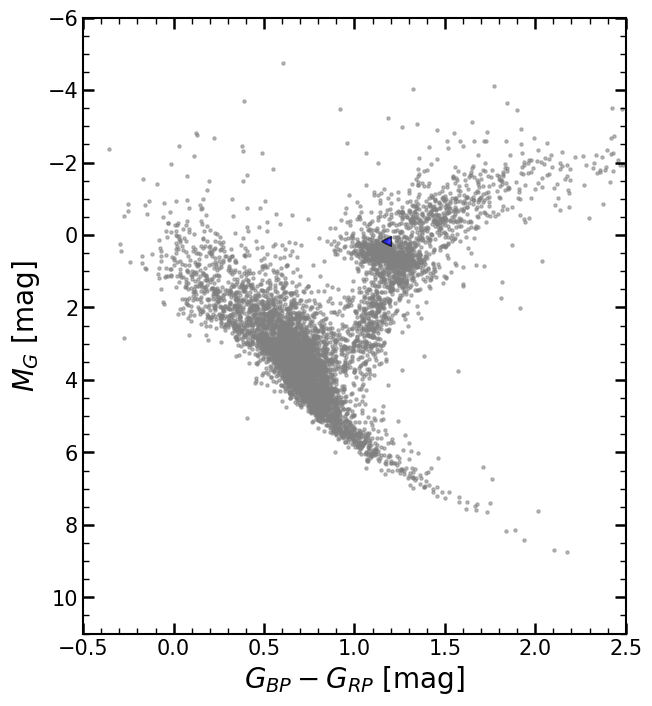

In [43]:
# Plot Single Target CMD
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')
ax.scatter(bprp_J0607, Mag_J0607, s=50, color='b', marker='<', alpha=0.7, edgecolors='black')
ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)

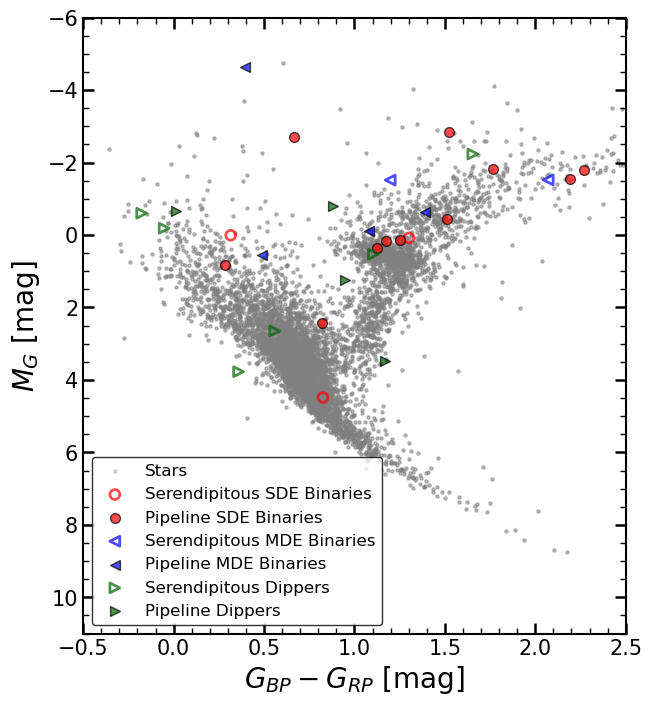

In [44]:
# Plot Full CMD
fig, ax = plt.subplots(1, 1, figsize=(7, 8))
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')

ax.scatter(Known_SDE_Color, Known_SDE_Mag, s=50, alpha=0.7, linewidth=2, label='Serendipitous SDE Binaries', facecolors='None', edgecolors='red')
ax.scatter(New_SDE_Color, New_SDE_Mag, s=50, color='red', alpha=0.7, label='Pipeline SDE Binaries', edgecolors='black')

ax.scatter(Known_MDE_Color, Known_MDE_Mag, s=50, marker='<', linewidth=2, alpha=0.7, label='Serendipitous MDE Binaries', facecolors='None', edgecolors='blue')
ax.scatter(New_MDE_Color, New_MDE_Mag, s=50, marker='<', color='blue', alpha=0.7, label='Pipeline MDE Binaries', edgecolors='black')

ax.scatter(Known_Dipper_Color, Known_Dipper_Mag, s=50, marker='>', linewidth=2, alpha=0.7, label='Serendipitous Dippers', facecolors='None', edgecolors='darkgreen')
ax.scatter(New_Dipper_Color, New_Dipper_Mag, s=50, marker='>', color='darkgreen', alpha=0.7, label='Pipeline Dippers', edgecolors='black')

ax.invert_yaxis()
ax.set_xlim(-0.5,2.5)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
ax.legend(fontsize='large',edgecolor='black', loc='lower left')

In [45]:
SDE_Mag = Known_SDE_Mag + New_SDE_Mag
SDE_Color = Known_SDE_Color + New_SDE_Color

MDE_Mag = Known_MDE_Mag + New_MDE_Mag
MDE_Color = Known_MDE_Color + New_MDE_Color

Dipper_Mag = Known_Dipper_Mag + New_Dipper_Mag
Dipper_Color = Known_Dipper_Color + New_Dipper_Color

In [46]:
print('SDE #:', len(SDE_Color))
SDE_Miss = [0,1,3,5,6,7,8,9]

print('MDE #:', len(MDE_Color))
MDE_Miss = [1,2,4]

print('Dipper #:', len(Dipper_Color))
Dipper_Miss = [0,2,4,5]

SDE #: 14
MDE #: 6
Dipper #: 10


Text(0, 0.5, '$M_G$ [mag]')

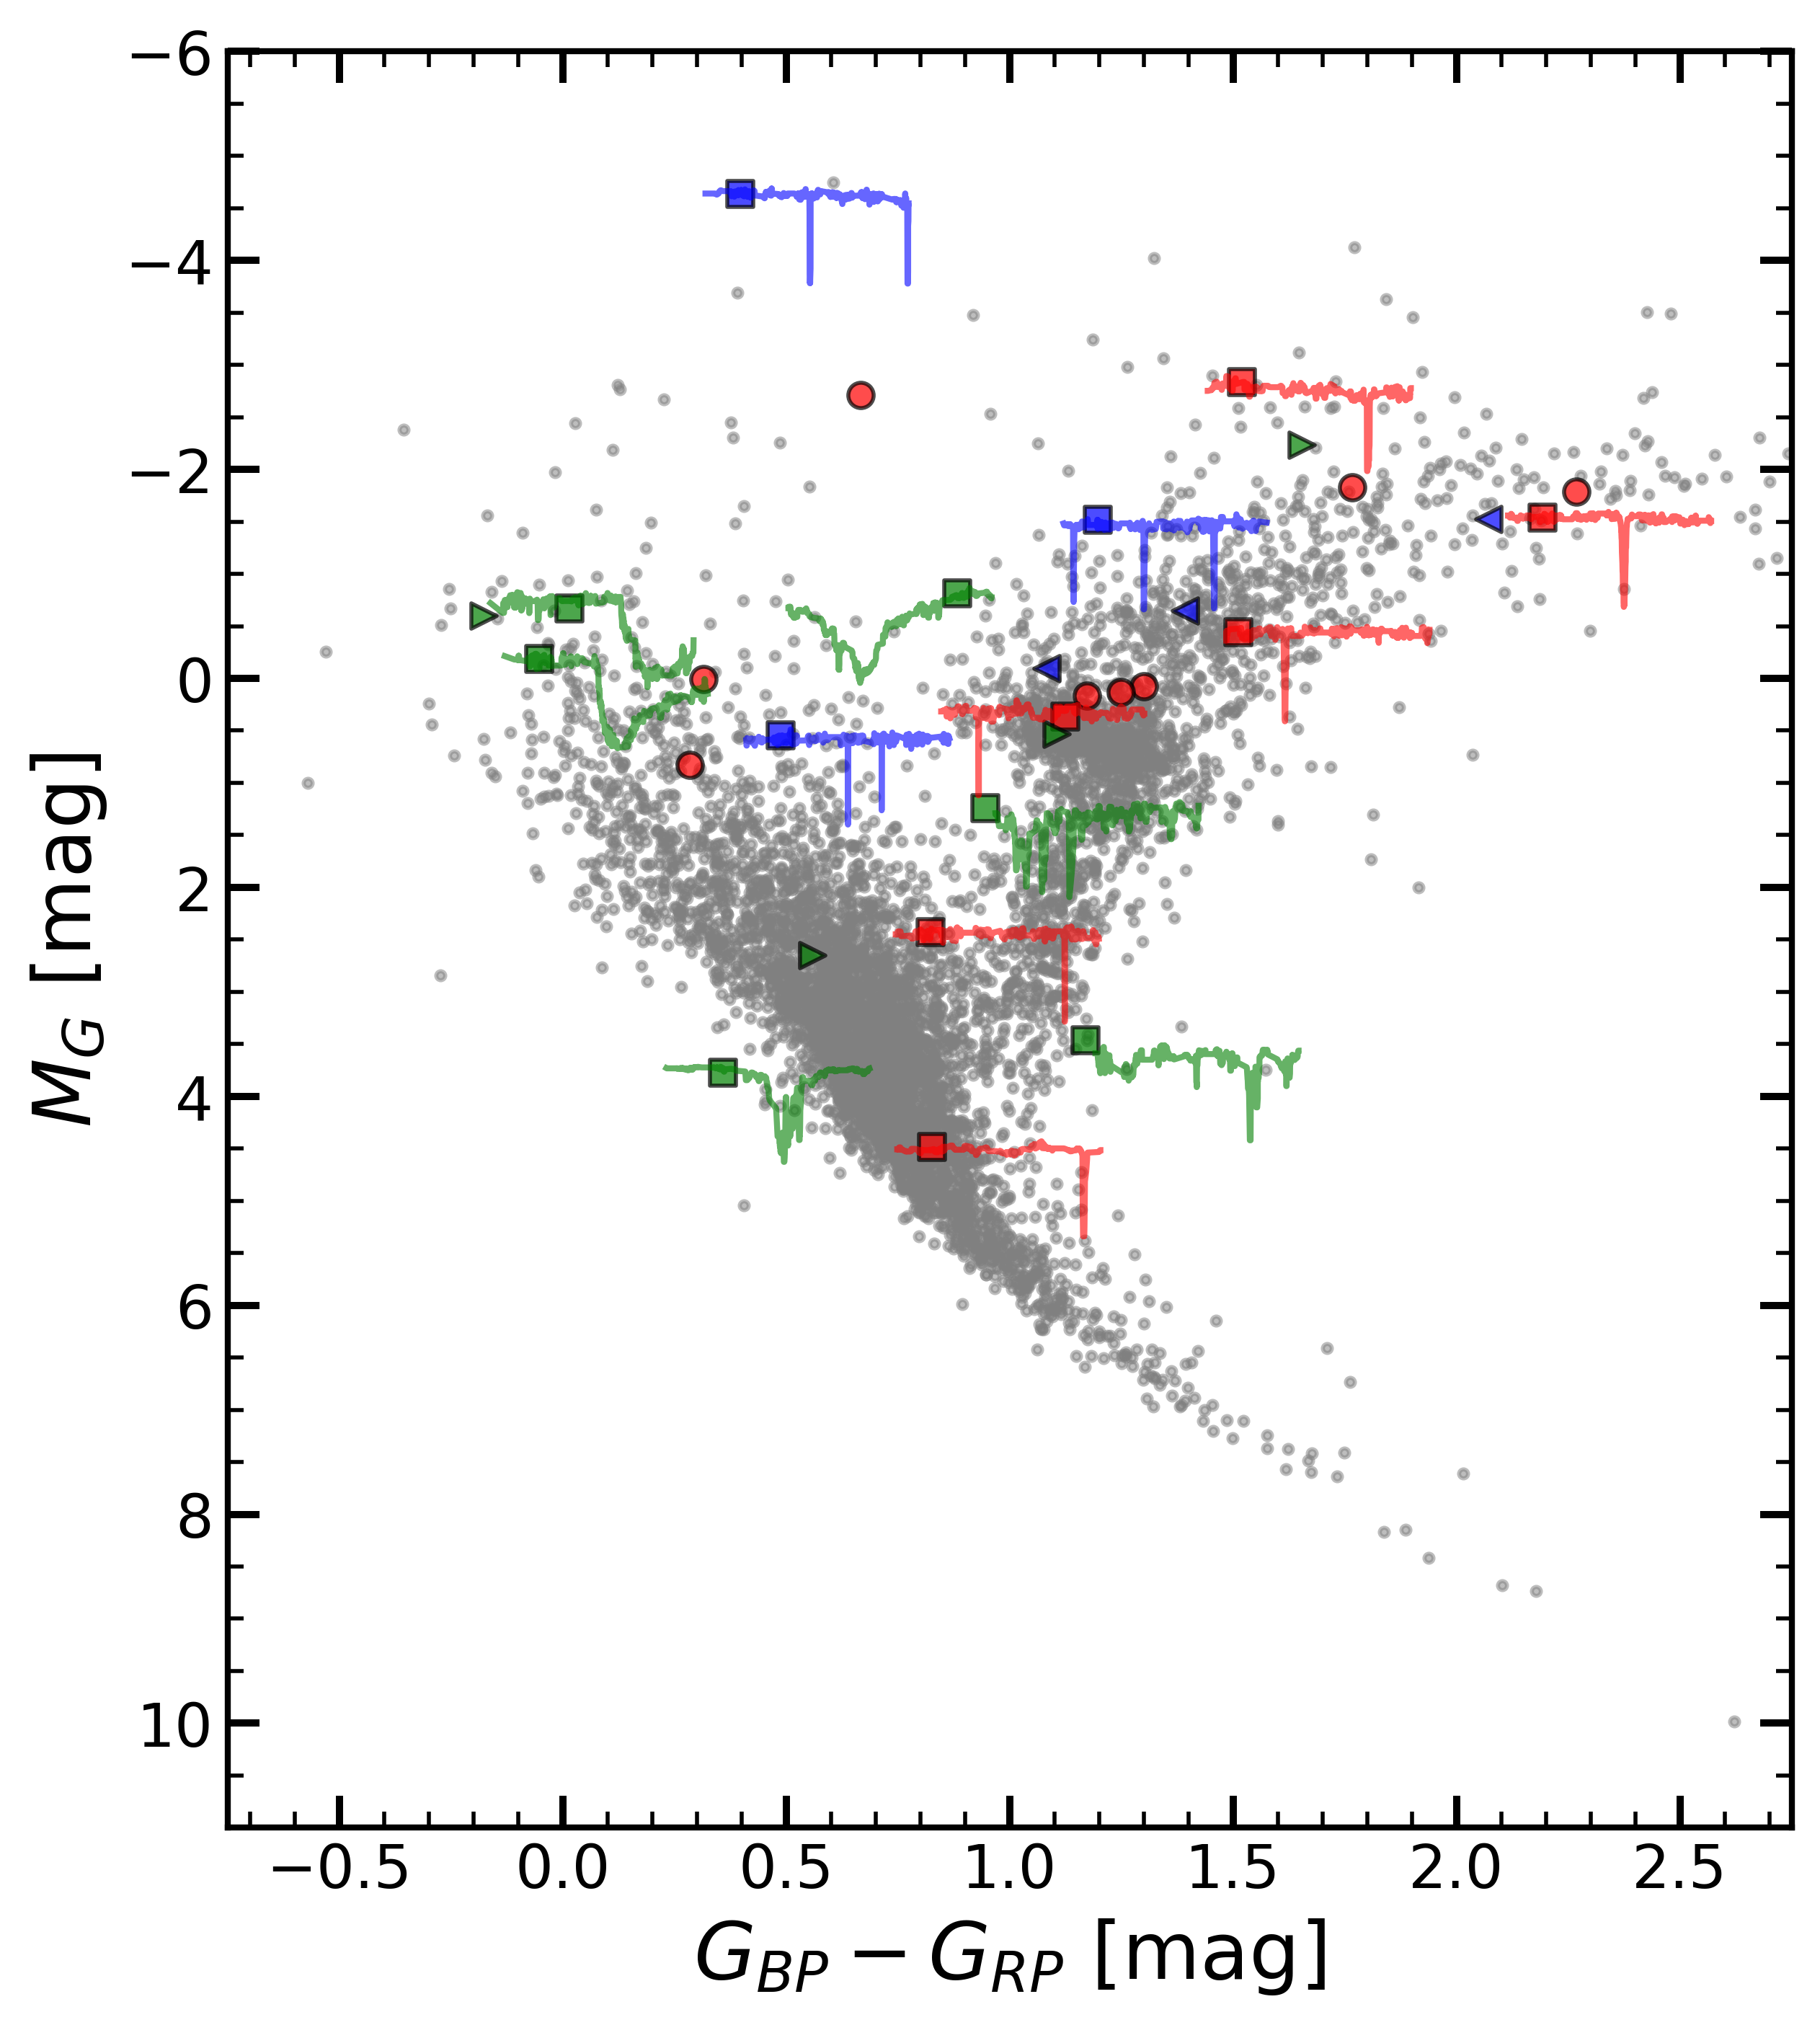

In [47]:
# Market CMD Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 8), dpi=400)
ax = plotparams(ax)
ax.scatter(bprp0, Mag0, s=5, color='grey', alpha=0.3)
ax.scatter(bprp1, Mag1, s=5, color='grey', alpha=0.3, label='Stars')

for i in SDE_Miss:
    ax.scatter(SDE_Color[i], SDE_Mag[i], s=40, color='r', marker='o', edgecolors='black', alpha=0.7)

# J223332+565552 
axin = ax.inset_axes([bprp_J225655-0.1,Mag_J225655-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J225655g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J225655g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J225655,Mag_J225655,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J073924−272916 
axin = ax.inset_axes([bprp_J0727-0.1,Mag_J0727-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0727g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0727g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0727,Mag_J0727,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J190316−195739 
axin = ax.inset_axes([bprp_J1919-0.05,Mag_J1919-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1919g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1919g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1919,Mag_J1919,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J205245−713514 
axin = ax.inset_axes([bprp_J2071-0.1,Mag_J2071-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2071g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2071g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2071,Mag_J2071,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J212132+480140 
axin = ax.inset_axes([bprp_J2148-0.1,Mag_J2148-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2148g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2148g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2148,Mag_J2148,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

# J225702+562312 
axin = ax.inset_axes([bprp_J225623-0.3,Mag_J225623-0.2,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J225623g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J225623g['Mag'],size=10),color='r',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J225623,Mag_J225623,s=40,color='r',marker='s',edgecolor='black', alpha=0.7)

for i in MDE_Miss:
    ax.scatter(MDE_Color[i], MDE_Mag[i], s=40, color='b', marker='<', edgecolors='black', alpha=0.7)

# J005437+644347 
axin = ax.inset_axes([bprp_J0064-0.1,Mag_J0064-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0064g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0064g['Mag'],size=3),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0064,Mag_J0064,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

# J124745−622756 
axin = ax.inset_axes([bprp_J1262-0.1,Mag_J1262-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1262g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1262g['Mag'],size=10),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1262,Mag_J1262,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

# J175912−120956 
axin = ax.inset_axes([bprp_J1712-0.1,Mag_J1712-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1712g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1712g['Mag'],size=3),color='b',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1712,Mag_J1712,s=40,color='b',marker='s',edgecolor='black', alpha=0.7)

for i in Dipper_Miss:
    ax.scatter(Dipper_Color[i], Dipper_Mag[i], s=40, color='g', marker='>', edgecolors='black', alpha=0.7)

# J081523−385923
axin = ax.inset_axes([bprp_J0838-0.15,Mag_J0838-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0838g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0838g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0838,Mag_J0838,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J114712−621057
axin = ax.inset_axes([bprp_J1162-0.1,Mag_J1162-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1162g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1162g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1162,Mag_J1162,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J042214+152530
axin = ax.inset_axes([bprp_J0415-0,Mag_J0415-0,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0415g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0415g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0415,Mag_J0415,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J080327−261620
axin = ax.inset_axes([bprp_J0826-0.2,Mag_J0826-0.2,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J0826g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J0826g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J0826,Mag_J0826,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J174328+343315
axin = ax.inset_axes([bprp_J1734-0,Mag_J1734-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J1734g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J1734g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J1734,Mag_J1734,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

# J202402+383938
axin = ax.inset_axes([bprp_J2038-0.4,Mag_J2038-0.1,0.5,1],transform=ax.transData,frameon=False)
axin.plot((J2038g['JD']-(2.458 * 10 **6)),ndimage.median_filter(J2038g['Mag'],size=10),color='g',alpha=0.6)
axin.set_xticks([])
axin.set_yticks([])
axin.invert_yaxis()
ax.scatter(bprp_J2038,Mag_J2038,s=40,color='g',marker='s',edgecolor='black', alpha=0.7)

ax.invert_yaxis()
ax.set_xlim(-0.75,2.75)
ax.set_ylim(11,-6)
ax.set_xlabel('$G_{BP} - G_{RP}$ [mag]', fontsize=20)
ax.set_ylabel('$M_G$ [mag]', fontsize=20)
#ax.legend(fontsize='large',edgecolor='black', loc='lower left')